#### Data comes from Kaggle https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

- StudentID - A unique identifier assigned to each student (1001 to 3392).
- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [39]:
df = pd.read_csv('Student_performance_data _.csv')
df = df.drop(columns=['StudentID'])
df['GradeClass'] = df['GradeClass'].astype(int)
df.rename(columns = {'ParentalEducation': 'ParentEduc', 'Volunteering': 'Volunt', 'StudyTimeWeekly': 
                     'StudyTimeWk', 'GradeClass': 'Grade', 'Extracurricular': 'Extracurr'}, inplace=True)
df

,Age,Gender,Ethnicity,ParentEduc,StudyTimeWk,Absences,Tutoring,ParentalSupport,Extracurr,Sports,Music,Volunt,GPA,Grade
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


#### Separate X features & y labels

In [42]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### SPLIT into Training & Test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling (Standard Scaler)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Why we do Scaler? Standardizing ensures that all features contribute equally to the distance metric used in the logistic regression model. 
# Without standardization, features with larger scales might dominate the learning process, potentially leading to biased results.

#### TRAIN the model

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

#### TEST the model

In [53]:
y_pred = model.predict(scaled_X_test)

new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

,y_test,y_pred
172,0,3
344,3,4
252,2,2
107,4,4
109,3,2


#### EVAULATE the model

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("Class labels:", model.classes_)

print('Coeficients')
columns = df.drop('Grade', axis=1).columns
coef_strings = [[f"{val:.6e}" for val in row] for row in model.coef_]
coef_df = pd.DataFrame(data=coef_strings, columns=columns, index=model.classes_)

coef_df

# For the first array:
    # as Age increases, the odds increase of getting grade A which is (0 class)
    # as Gender increases, the odds decrease of getting grade A
    # as Ethnicity increases, the odds increase of getting grade A... and so on
# so if we look at the first array of grade 0/A, we can see: Age, Gender, Ethnicity, ParentEducation and Sports are among the strongest predictors

Class labels: [0 1 2 3 4]
Coeficients


,Age,Gender,Ethnicity,ParentEduc,StudyTimeWk,Absences,Tutoring,ParentalSupport,Extracurr,Sports,Music,Volunt,GPA
0,7.842092e-03,-8.022386e-02,5.986634e-02,7.928787e-03,3.373608e-02,3.221259e-01,1.248043e-01,2.325169e-01,1.223852e-01,-8.977149e-03,-1.213772e-01,-1.394881e-01,2.516428e+00
1,4.618179e-02,5.453728e-02,-5.668721e-02,-5.388562e-02,9.072045e-02,-1.984614e-01,8.262637e-02,-2.649511e-02,-2.630227e-02,1.982969e-02,4.327002e-02,2.304863e-02,1.595655e+00
2,5.491968e-02,1.141535e-02,-2.558420e-03,-8.453075e-02,-4.209001e-02,-3.621801e-01,-6.336432e-02,-8.123363e-02,1.881778e-02,-9.070792e-02,-3.152302e-02,-8.906133e-03,4.122608e-01
3,-8.957421e-03,1.262830e-02,3.888195e-02,2.297321e-02,-4.788278e-02,9.851876e-02,-9.342812e-02,-7.149349e-02,-5.707848e-02,2.278323e-02,1.525488e-02,3.394340e-03,-7.436887e-01
4,-9.998614e-02,1.642931e-03,-3.950267e-02,1.075144e-01,-3.448374e-02,1.399968e-01,-5.063827e-02,-5.329465e-02,-5.782220e-02,5.707214e-02,9.437536e-02,1.219513e-01,-3.780655e+00


In [103]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")


# micro -Useful when you want to treat all classes equally and don’t want any class to be weighted more heavily than others.
    #is less common but useful for global performance metrics.
# macro - Useful when you want to treat all classes equally and you want the metric to be unaffected by class imbalance.
# weighted - Useful when you want to account for the imbalance in the dataset, giving more importance to classes with more instances. 
    #It often the go-to choice for practical purposes, especially with imbalanced datasets.

Accuracy Score: 0.778705636743215
Precision Score: 0.7381121638229463
Recall Score: 0.778705636743215
F1 Score: 0.7534189269674992


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


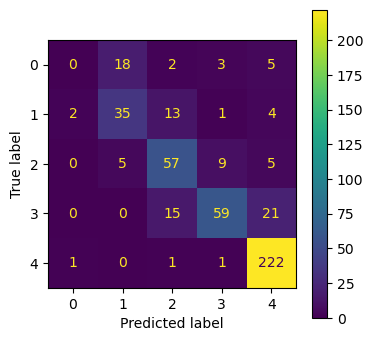

In [111]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(4, 4)

#### Visualize the model

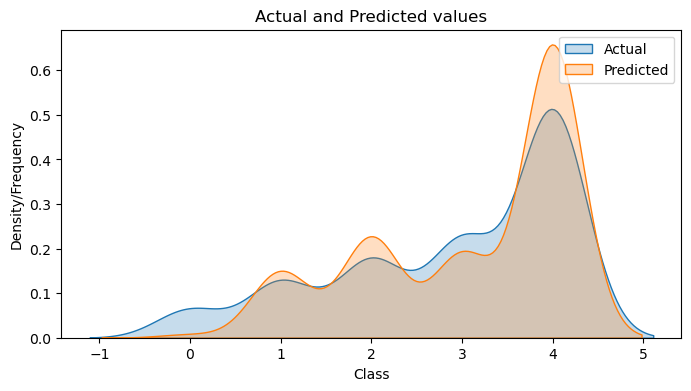

In [119]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred mostly overlap, thus the predictions are closely aligned with the actual values.

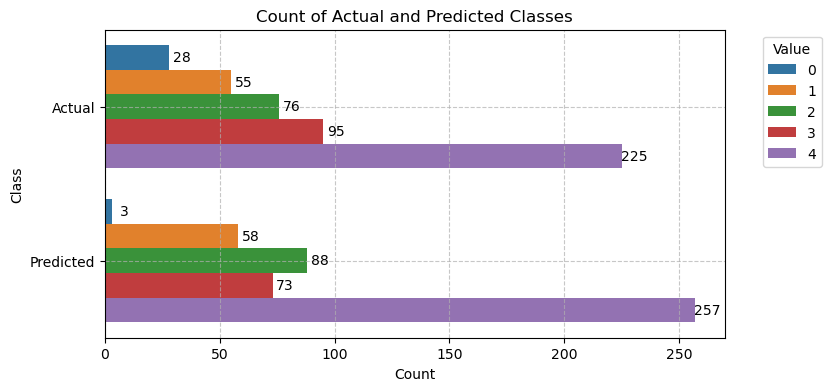

In [123]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(, 4))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

Over all a good model with 77% accuracy and Precision, Recall and F1 score not too far out from the accuracy. Perhaps take out some of the lower predictors such as Tutoring (at a fast glace)

#### Predict new student

In [126]:
model.predict(scaler.transform([[18, 1, 0, 0, 14, 2, 0, 0, 0, 0, 0, 0, 3.4 ]]))
# if a student is 18 years old, is female, caucasian, parents have no education, spends 14 hrs weekly studying, 2 times number of absences, 
# no tutoring, no parantal support, no extracurricular, no sports, no music, no volunteering, and has GPA of 3.2
# then she will get an class 1 which is B

array([1])

In [127]:
model.predict(scaler.transform([[18, 1, 0, 3 , 14, 2, 0, 1, 1, 0, 0, 0, 3.0 ]]))
# if a student is 18 years old, is female, caucasian, parents have no Bachelors, spends 14 hrs weekly studying, 2 times number of absences, 
# no tutoring, low parantal support, yes to extracurricular, no sports, no music, no volunteering, and has GPA of 3.0
# then she will get an class 2 which is C

array([2])

- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)